In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets


In [2]:
# Load the wine dataset
# The wine dataset is a classic dataset for classification tasks in machine learning.
# It contains 13 features related to chemical properties of wine and a target variable indicating the wine class.

(X,y) = datasets.load_wine(return_X_y=True, as_frame=True)

In [3]:

print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (178, 13)
Shape of y: (178,)


In [4]:
# Display the first 3 rows of the feature set
X.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


In [5]:
# Display the first 3 rows of the target variable
y.groupby(y).count()

target
0    59
1    71
2    48
Name: target, dtype: int64

In [6]:
from sklearn.tree import DecisionTreeClassifier


In [7]:
tree_instance = DecisionTreeClassifier(random_state=0, max_depth=5)

In [8]:
X.sample(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
66,13.11,1.01,1.70,15.0,78.0,2.98,3.18,0.26,2.28,5.3,1.12,3.18,502.0
65,12.37,1.21,2.56,18.1,98.0,2.42,2.65,0.37,2.08,4.6,1.19,2.30,678.0


In [9]:
y.sample(3)

25     0
110    1
129    1
Name: target, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [14]:
tree_instance.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [15]:
# Ensure the model is fitted before accessing the tree_ attribute
if hasattr(tree_instance, "tree_"):
	# Display the number of nodes in the decision tree
	tree_instance.tree_.node_count
else:
	print("The model has not been fitted yet. Please fit the model before accessing the tree_ attribute.")


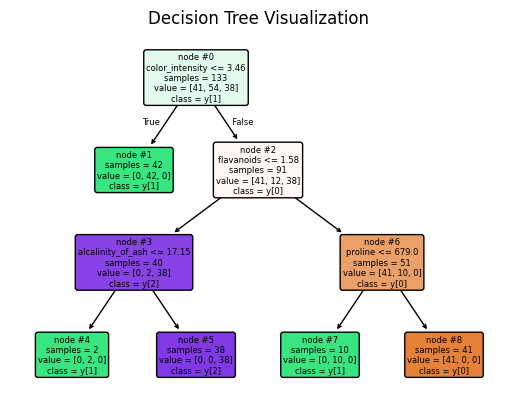

In [16]:
from sklearn.tree import plot_tree
plot_tree(
    tree_instance,
          filled=True,
          feature_names=X_train.columns,
          class_names=True,
          fontsize=6,
          label='all' ,
          impurity=False,
          rounded=True,
          precision=2,
          proportion=False,
          node_ids=True
          )
plt.title('Decision Tree Visualization')
plt.show()


In [17]:
y_pred = tree_instance.predict(X_test)
y_pred


array([2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       2, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 2, 0, 1, 0, 0, 1, 2, 0,
       0])

In [18]:
print(X_test.iloc[0:2,[6,9]])
print('Etiquetas: ', y_pred[0:2])

     flavanoids  color_intensity
161        0.56             5.88
117        2.09             2.06
Etiquetas:  [2 1]


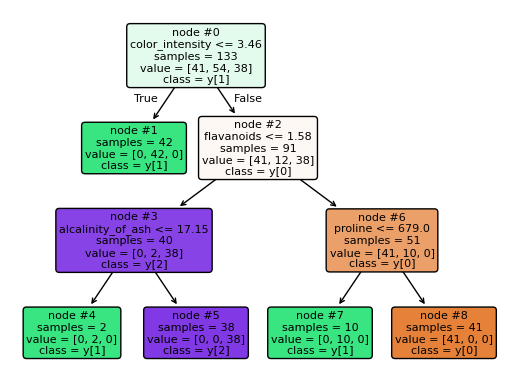

In [19]:
plot_tree(
    tree_instance,
          filled=True,
          feature_names=X_train.columns,
          class_names=True,
          fontsize=8,
          label='all' ,
          impurity=False,
          rounded=True,
          precision=2,
          proportion=False,
          node_ids=True
          )
plt.show()

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) # 0.9333

0.9555555555555556